In [2]:
import omicverse as ov
from omicverse.utils import mde
import scanpy as sc
#import scvelo as scv
ov.utils.ov_plot_set()

In [3]:
adata=ov.read('../data/crc_data.h5ad')
adata

AnnData object with n_obs × n_vars = 132726 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
import scanpy as sc
import cupy as cp

import time
import rapids_singlecell as rsc

import warnings
import rmm
from rmm.allocators.cupy import rmm_cupy_allocator



In [6]:

rmm.reinitialize(
    managed_memory=True,  # Allows oversubscription
    pool_allocator=True,  # default is False
    devices=0,  # GPU device IDs to register. By default registers only GPU 0.
)
cp.cuda.set_allocator(rmm_cupy_allocator)

In [7]:
!gpustat

ab-Z370-HD3                    Tue Apr 30 18:24:18 2024  535.104.05
[0] NVIDIA GeForce RTX 2080 Ti | 42°C,   0 % |   790 / 11264 MB | zehuazeng(344M) zehuazeng(154M) gdm(35M) ab(77M) ab(107M) ab(3M) ab(6M)


In [15]:
rsc.get.anndata_to_GPU(adata)

In [26]:
rsc.pp.normalize_total(adata, target_sum=1e4)

In [19]:
rsc.pp.log1p(adata)

In [20]:
adata

AnnData object with n_obs × n_vars = 132726 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [21]:
!gpustat

ab-Z370-HD3                    Tue Apr 30 18:26:05 2024  535.104.05
[0] NVIDIA GeForce RTX 2080 Ti | 44°C,   0 % |  2330 / 11264 MB | zehuazeng(344M) zehuazeng(156M) gdm(35M) ab(77M) ab(107M) ab(3M) ab(6M)


In [22]:
rsc.get.anndata_to_CPU(adata, convert_all=True)

In [23]:
!gpustat

ab-Z370-HD3                    Tue Apr 30 18:26:09 2024  535.104.05
[0] NVIDIA GeForce RTX 2080 Ti | 44°C,   6 % |  2330 / 11264 MB | zehuazeng(344M) zehuazeng(156M) gdm(35M) ab(77M) ab(107M) ab(3M) ab(6M)


In [17]:
adata.raw.to_adata().shape

(132726, 25121)

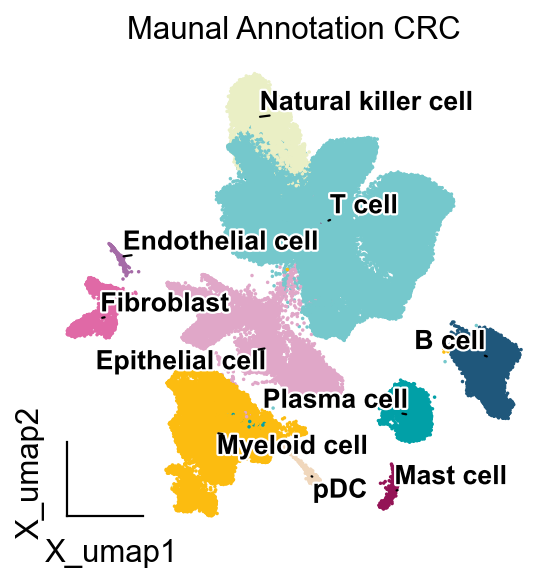

In [99]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata,
    basis="X_umap",
    color=['major_celltype'],
    frameon='small',
    title="Maunal Annotation CRC",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    legend_loc=None, add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    palette=ov.palette()[11:],
    #legend_fontweight='normal'
)
ov.utils.gen_mpl_labels(
    adata,
    'major_celltype',
    exclude=("None",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize= 12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

fig.savefig("../figures/scrna/umap_celltype_all.png",dpi=300,bbox_inches = 'tight')
fig.savefig("../pdf/scrna/umap_celltype_all.pdf",dpi=300,bbox_inches = 'tight')


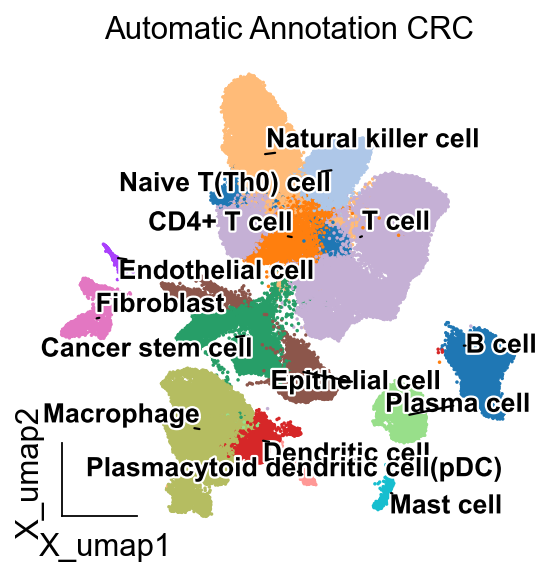

In [8]:
 import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata,
    basis="X_umap",
    color=['scsa_celltype'],
    frameon='small',
    title="Automatic Annotation CRC",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    legend_loc=None, add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.palette()[12:],
    #legend_fontweight='normal'
)
ov.utils.gen_mpl_labels(
    adata,
    'scsa_celltype',
    exclude=("None",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize= 12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

fig.savefig("../figures/scrna/umap_celltype_all_scsa.png",dpi=300,bbox_inches = 'tight')
fig.savefig("../pdf/scrna/umap_celltype_all_scsa.pdf",dpi=300,bbox_inches = 'tight')


In [9]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import f1_score
f1 = f1_score(adata.obs['major_celltype'],adata.obs['scsa_true_celltype'], average='weighted')
ami_score = adjusted_mutual_info_score(adata.obs['major_celltype'],adata.obs['scsa_true_celltype'])

print("F1 score with average='weighted':", f1)
print("AMI score':", ami_score)

F1 score with average='weighted': 0.8559731414725444
AMI score': 0.7871453798045036


In [13]:
import pandas as pd
import numpy as np
mat=np.zeros((14,10))
pd_mat=pd.DataFrame(mat, index=['B cell', 'Cancer stem cell', 'Dendritic cell','Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Macrophage',
       'Mast cell', 'Naive T(Th0) cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'CD4+ T cell', 'T cell'], columns=['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Myeloid cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'T cell'])
for i in range(len(adata.obs)):
    scsa_celltype = adata.obs.iloc[i]['scsa_celltype']
    major_celltype = adata.obs.iloc[i]['major_celltype']
    pd_mat.loc[scsa_celltype, major_celltype] += 1    
pd_mat.head()

B cell  Endothelial cell  Epithelial cell  Fibroblast  \
B cell            7006.0               0.0              0.0         0.0   
Cancer stem cell     0.0               0.0           5563.0         0.0   
Dendritic cell       0.0               0.0              0.0         0.0   
Endothelial cell     0.0             307.0              0.0         0.0   
Epithelial cell      0.0               0.0           5847.0         0.0   

                  Mast cell  Myeloid cell  Natural killer cell  Plasma cell  \
B cell                  0.0           0.0                  0.0          0.0   
Cancer stem cell        0.0           0.0                  0.0          0.0   
Dendritic cell          0.0        2512.0                  0.0          0.0   
Endothelial cell        0.0           0.0                  0.0          0.0   
Epithelial cell         0.0           0.0                  0.0          0.0   

                  Plasmacytoid dendritic cell(pDC)  T cell  
B cell                                         0.0  4769.0  
Cancer stem cell                               0.0     0.0  
Dendritic cell                                 0.0     0.0  
Endothelial cell                               0.0     0.0  
Epithelial cell                                0.0     0.0

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
normalized_mat = scaler.fit_transform(mat)
pd_nor_mat=pd.DataFrame(normalized_mat, index=['B cell', 'Cancer stem cell', 'Dendritic cell','Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Macrophage',
       'Mast cell', 'Naive T(Th0) cell', 'Natural killer cell', 'Plasma cell',
       'pDC', 'CD4+ T cell', 'T cell'], columns=['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Myeloid cell', 'Natural killer cell', 'Plasma cell',
       'pDC', 'T cell'])

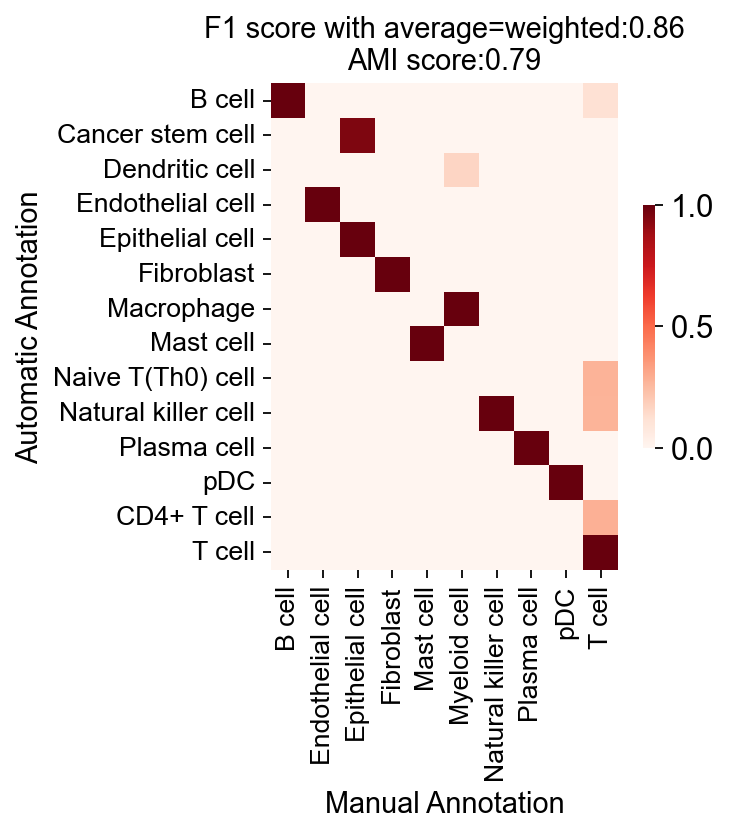

In [30]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(pd_nor_mat, cmap="Reds",square=True,cbar_kws={'shrink':0.5})
plt.ylabel('Automatic Annotation', fontsize=13)
plt.xlabel('Manual Annotation', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("F1 score with average=weighted:{:.2f}\nAMI score:{:.2f}".format(f1,ami_score),
         fontsize=13)
plt.savefig("../figures/scrna/heatmap_celltype.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/heatmap_celltype.pdf",dpi=300,bbox_inches = 'tight')


In [31]:
adata=adata.raw.to_adata()
adata.X.max()

8.85514

In [32]:
adata.X.min()

0.0

In [90]:
adata.obs['major_celltype']=adata.obs['major_celltype'].astype(str)
adata.obs.loc[adata.obs['major_celltype']=='Plasmacytoid dendritic cell(pDC)','major_celltype']='pDC'

In [91]:
singledata=adata.copy()
import random
random_obs_index=random.sample(list(singledata.obs.index),14000)
singledata=singledata[random_obs_index]
singledata

View of AnnData object with n_obs × n_vars = 14000 × 25121
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [92]:
import anndata
sc.pp.filter_cells(singledata, min_genes=200)
sc.pp.filter_genes(singledata, min_cells=3)
adata1=anndata.AnnData(singledata.X,obs=pd.DataFrame(index=singledata.obs.index),
                          var=pd.DataFrame(index=singledata.var.index))
adata1.write_h5ad('cpdb/cpdb.h5ad',compression='gzip')
adata1

filtered out 4706 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 14000 × 20415

In [93]:
#meta导出
df_meta = pd.DataFrame(data={'Cell':list(singledata[adata1.obs.index].obs.index),
                             'cell_type':[ i for i in singledata[adata1.obs.index].obs['major_celltype']]
                            })
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('cpdb/meta.tsv', sep = '\t')

In [94]:
import os
cpdb_file_path = '/mnt/data/cellphonedb.zip'
meta_file_path = os.getcwd()+'/cpdb/meta.tsv'
counts_file_path = os.getcwd()+'/cpdb/cpdb.h5ad'
microenvs_file_path = None
out_path =os.getcwd()+'/cpdb/test_cellphone'

In [95]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

deconvoluted, means, pvalues, significant_means = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 4,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/mnt/home/zehuazeng/analysis/ov/test3/cpdb/cpdb.h5ad
/mnt/home/zehuazeng/analysis/ov/test3/cpdb/meta.tsv
[ ][CORE][20/10/23-00:44:58][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:4 Precision:3
[ ][CORE][20/10/23-00:44:58][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][20/10/23-00:44:59][INFO] Running Real Analysis
[ ][CORE][20/10/23-00:44:59][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [01:30<00:00, 11.06it/s]

[ ][CORE][20/10/23-00:46:29][INFO] Building Pvalues result


[ ][CORE][20/10/23-00:46:29][INFO] Building results
Saved deconvoluted to /mnt/home/zehuazeng/analysis/ov/test3/cpdb/test_cellphone/statistical_analysis_deconvoluted_10_20_2023_00:46:30.txt
Saved means to /mnt/home/zehuazeng/analysis/ov/test3/cpdb/test_cellphone/statistical_analysis_means_10_20_2023_00:46:30.txt
Saved pvalues to /mnt/home/zehuazeng/analysis/ov/test3/cpdb/test_cellphone/statistical_analysis_pvalues_10_20_2023_00:46:30.txt
Saved significant_means to /mnt/home/zehuazeng/analysis/ov/test3/cpdb/test_cellphone/statistical_analysis_significant_means_10_20_2023_00:46:30.txt


In [96]:
interaction=ov.single.cpdb_network_cal(adata = adata,
        pvals = pvalues,
        celltype_key = "major_celltype",)   
interaction['interaction_edges'].head()

ktplotspy have been install version: 0.1.10


SOURCE            TARGET  COUNT
0  B cell            B cell      2
1  B cell  Endothelial cell      5
2  B cell   Epithelial cell      4
3  B cell        Fibroblast      3
4  B cell         Mast cell      1

ktplotspy have been install version: 0.1.10


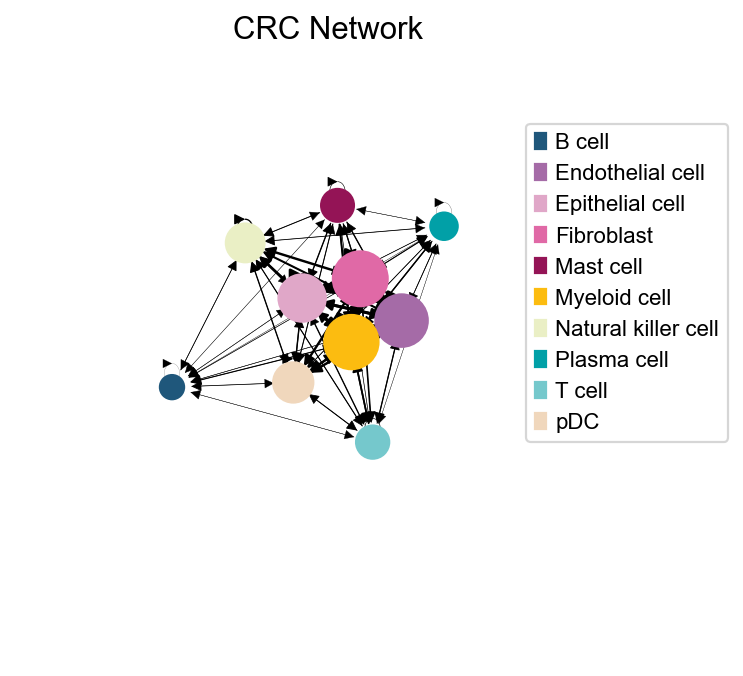

In [103]:
ov.single.cpdb_plot_network(adata=adata,
                  interaction_edges=interaction['interaction_edges'],
                  celltype_key='major_celltype',
                  nodecolor_dict=None,title='CRC Network',
                  edgeswidth_scale=30, nodesize_scale=1, pos_scale=1, 
                pos_size=4, figsize=(5, 5), legend_ncol=1, legend_bbox=(0.8,0.9), 
                legend_fontsize=10, return_graph=False)
plt.savefig("../figures/scrna/network_crc.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/network_crc.pdf",dpi=300,bbox_inches = 'tight')


In [57]:
adata_can=ov.read('../data/crc-via.h5ad')
adata_can

AnnData object with n_obs × n_vars = 11410 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

<AxesSubplot: title={'center': 'scsa_true_celltype'}, xlabel='X_umap1', ylabel='X_umap2'>

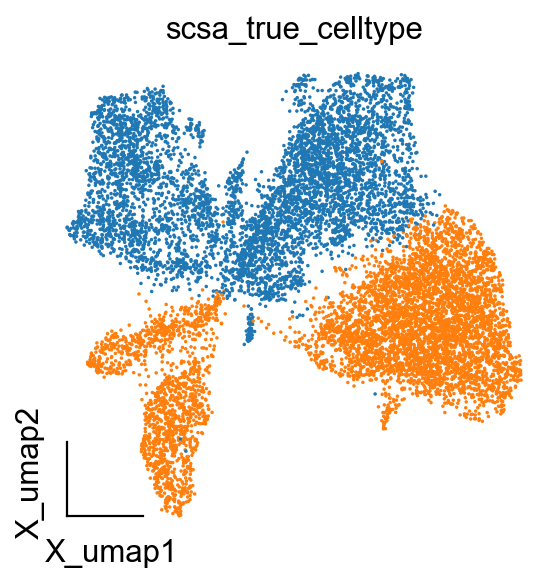

In [58]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata_can,
    basis="X_umap",
    color=['scsa_true_celltype'],
    frameon='small',
    #title="Automatic Annotation CRC",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    legend_loc=None, add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.palette()[12:],
    #legend_fontweight='normal'
)

In [60]:
adata_can.raw

In [ ]:
sc.tl.pca(adata_can, n_comps=100, svd_solver="auto")
sc.pp.neighbors(adata_can, metric="cosine")
sc.tl.leiden(adata_can)
sc.tl.paga(adata_can)
sc.pl.paga(adata_can, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_can,init_pos='paga')
sc.tl.dendrogram(adata_can,'leiden')


In [63]:
adata_can.uns['log1p']['base']=10
sc.tl.rank_genes_groups(adata_can, 'leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:12)


<AxesSubplot: title={'center': 'leiden'}, xlabel='X_umap1', ylabel='X_umap2'>

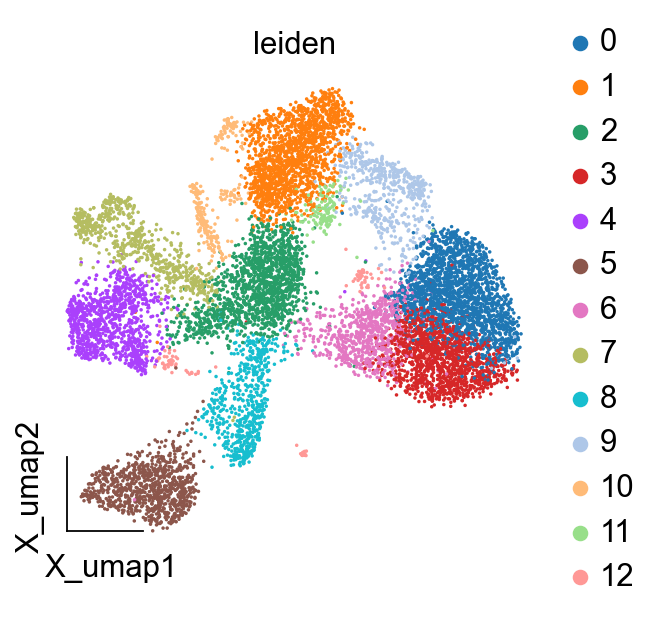

In [141]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata_can,
    basis="X_umap",
    color=['leiden'],
    frameon='small',
    #title="Automatic Annotation CRC",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    #legend_loc=None, 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.palette()[12:],
    #legend_fontweight='normal'
)

In [68]:
via=ov.single.pySCSA(adata=adata_can,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='cancer',
                          target='cancersea',
                          tissue='All',
                     model_path='/mnt/home/zehuazeng/analysis/RB/temp/pySCSA_2023_v2_plus.db'  
)

In [69]:
celltype=via.cell_anno(clustertype='leiden',
               cluster='all')

ranking genes
    finished (0:00:11)
...Auto annotate cell
Version V2.1 [2023/06/27]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.1 [2023/06/27]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 12611
Cluster 0 Gene number: 490
Other Gene number: 453
Cluster 1 Gene number: 395
Other Gene number: 468
Cluster 10 Gene number: 174
Other Gene number: 478
Cluster 11 Gene number: 460
Other Gene number: 437
Cluster 12 Gene number: 662
Other Gene number: 416
Cluster 2 Gene number: 61
Other Gene number: 479
Cluster 3 Gene number: 204
Other Gene number: 474
Cluster 4 Gene number: 847
Other Gene number: 432
Cluster 5 Gene number: 967
Other Gene number: 431
Cluster 6 Gene number: 15
Other Gene number: 480
Cluster 7 Gene number: 311
Other Gene number: 476
Cluster 8 Gene number: 66
Other Gene number: 479

In [70]:
via.cell_auto_anno(adata_can,key='scsa_celltype_cancer')

...cell type added to scsa_celltype_cancer on obs of anndata


In [148]:
cluster2annotation = {
     '0': 'Cell Cycle',
     '1': 'Metastasis-2',
     '2': 'Quiescence',
     '3': 'Metastasis-1',
     '4': 'Stemness',
     '5': 'Differentiation',
     '6': 'Differentiation',
     '7': 'Stemness',
     '8': 'EMT',
     '9': 'Metastasis-2',
     '10': 'Stemness',
     '11': 'Cell Cycle',
    '12': 'Inflammation'
}
adata_can.obs['minor_celltype'] = adata_can.obs['leiden'].map(cluster2annotation).astype('category')

<AxesSubplot: title={'center': 'minor_celltype'}, xlabel='X_umap1', ylabel='X_umap2'>

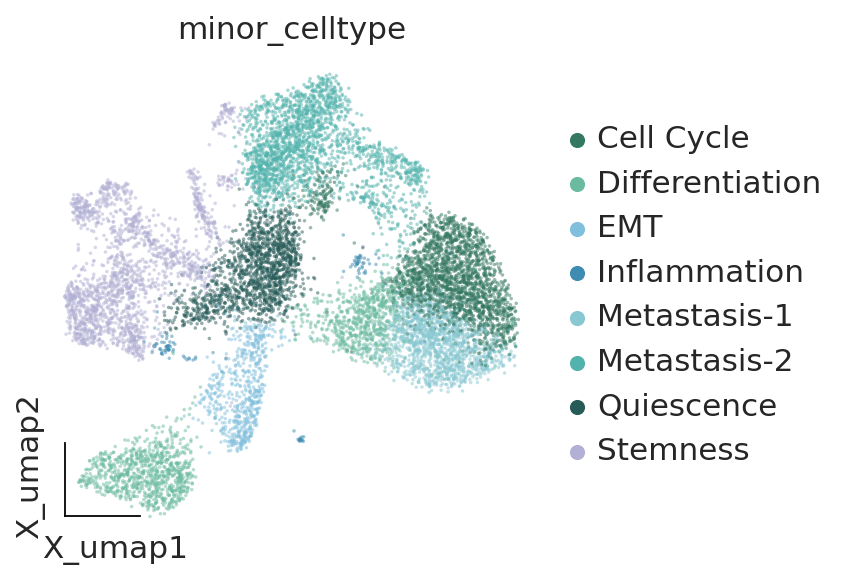

In [247]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata_can,
    basis="X_umap",
    color=['minor_celltype'],
    frameon='small',
    #title="Automatic Annotation CRC",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    alpha=0.5,
    #legend_loc='', 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    palette=ov.utils.blue_color[:],
    #legend_fontweight='normal'
)

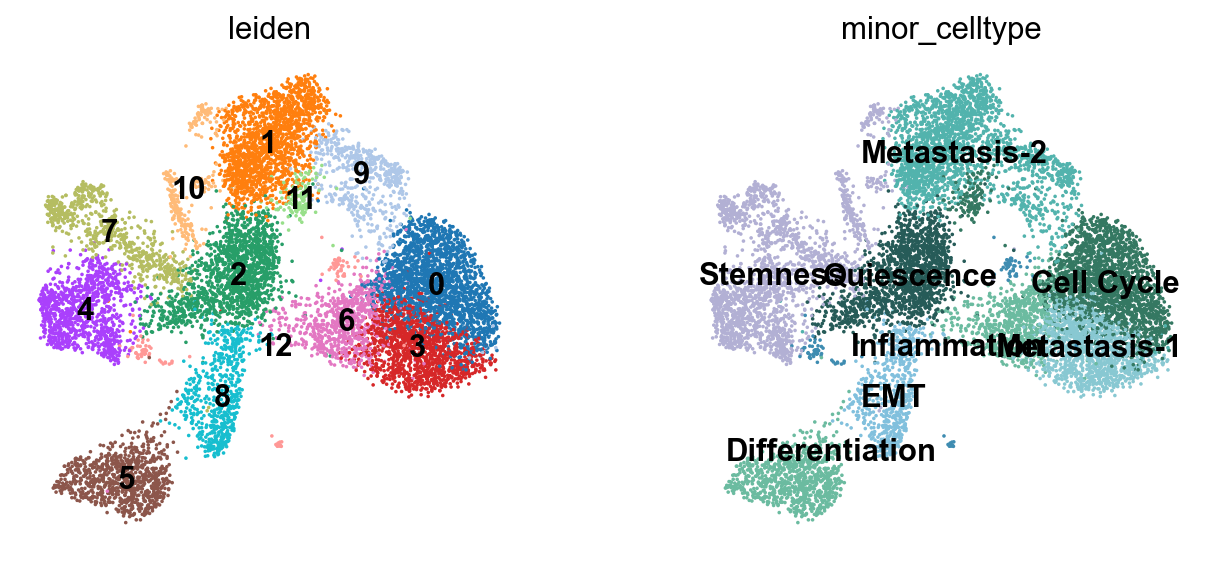

In [151]:
sc.pl.umap(adata_can, color=['leiden','minor_celltype'], legend_loc='on data', frameon=False)

In [152]:
v0 = ov.single.pyVIA(adata=adata_can,adata_key='X_pca',adata_ncomps=80, basis='X_umap',
                         clusters='minor_celltype',knn=30,random_seed=4,root_user=['Stemness'],dataset='group')

v0.run()

2023-10-20 01:07:36.869675	Running VIA over input data of 11410 (samples) x 80 (features)
2023-10-20 01:07:36.869709	Knngraph has 30 neighbors
2023-10-20 01:07:38.988202	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 44.3 % of edges. 
2023-10-20 01:07:39.027601	Number of connected components used for clustergraph  is 1
2023-10-20 01:07:39.441992	Commencing community detection
2023-10-20 01:07:40.396358	Finished running Leiden algorithm. Found 104 clusters.
2023-10-20 01:07:40.398854	Merging 82 very small clusters (<10)
2023-10-20 01:07:40.400971	Finished detecting communities. Found 22 communities
2023-10-20 01:07:40.401446	Making cluster graph. Global cluster graph pruning level: 0.15
2023-10-20 01:07:40.422670	Graph has 1 connected components before pruning
2023-10-20 01:07:40.424105	Graph has 1 connected components after pruning
2023-10-20 01:07:40.424230	Graph has 1 connected components after reconnecting
2023-10-20 01:07:40.424623	0.0% links tri

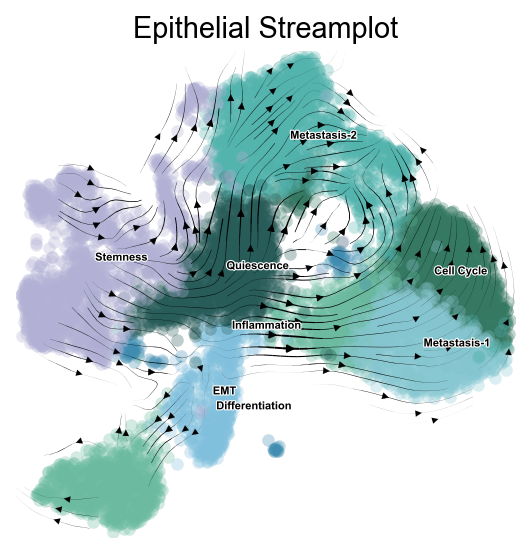

In [153]:
fig,ax=v0.plot_stream(basis='X_umap',clusters='minor_celltype',
               density_grid=0.8, scatter_size=30, scatter_alpha=0.3, linewidth=0.5)
plt.title('Epithelial Streamplot',fontsize=13)
fig.savefig("../figures/scrna/epi_streamplot.png",dpi=300,bbox_inches = 'tight')

In [154]:
v0.get_pseudotime(adata_can)
sc.pp.neighbors(adata_can,n_neighbors= 15,use_rep='X_pca')
ov.utils.cal_paga(adata_can,use_time_prior='pt_via',vkey='paga',
                 groups='minor_celltype')

...the pseudotime of VIA added to AnnData obs named `pt_via`
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


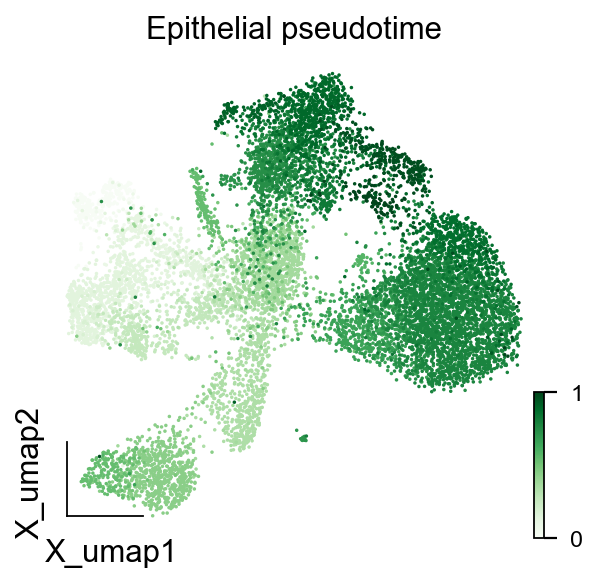

In [159]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata_can,
    basis="X_umap",
    color=['pt_via'],
    frameon='small',
    title="Epithelial pseudotime",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    legend_loc=None, add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    palette=ov.utils.blue_color[:],
    cmap='Greens'
    #legend_fontweight='normal'
)
plt.savefig("../figures/scrna/epi_time.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/epi_time.pdf",dpi=300,bbox_inches = 'tight')


In [130]:
adata_can

AnnData object with n_obs × n_vars = 11410 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype', 'scsa_celltype_cancer', 'pt_via'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap', 'scsa_true_celltype_colors', 'scsa_celltype_cancer_colors', 'paga_graph', 'major_celltype_sizes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

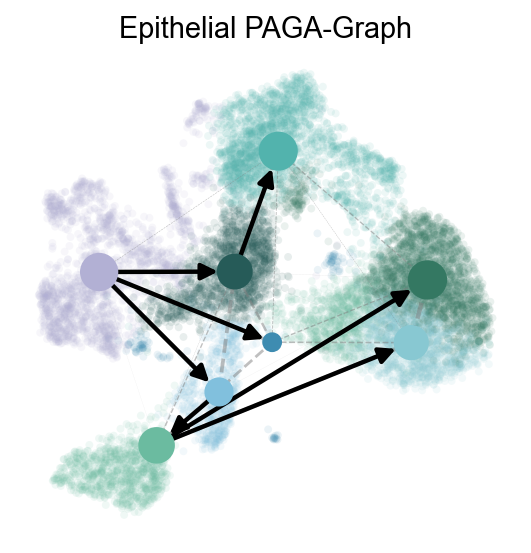

In [157]:
ov.utils.plot_paga(adata_can,basis='umap', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.title('Epithelial PAGA-Graph',fontsize=13)
#plt.title('PAGA Dentategyrus (BulkTrajBlend)',fontsize=13)
plt.savefig("../figures/scrna/epi_paga.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/epi_paga.pdf",dpi=300,bbox_inches = 'tight')


In [106]:
sub_means=ov.single.cpdb_submeans_exacted(means,cell_names='Epithelial cell',cell_type='receptor')


In [110]:
adata_can1=adata_can.raw.to_adata()

In [107]:
inter_gene={}
for i in adata.obs['major_celltype'].cat.categories[adata.obs['major_celltype'].cat.categories!='Epithelial cell']:
    cp=ov.single.cpdb_interaction_filtered(
        adata = adata,
        cell_type1 = "Epithelial cell",
        cell_type2 = i,
        means = sub_means,
        pvals = pvalues,
        celltype_key = "major_celltype",
    )
    inter_gene[i]=cp

ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10
ktplotspy have been install version: 0.1.10


In [108]:
cell_n='pDC'
list(set(adata.var_names) & set([i.split('-')[1] for i in inter_gene[cell_n]]))

['CD44',
 'P4HB',
 'TNFRSF21',
 'PLXNB2',
 'BSG',
 'SORL1',
 'AXL',
 'MPZL1',
 'PROCR',
 'LRFN4',
 'LTBR',
 'ADGRE5',
 'EGFR',
 'CD74']

In [116]:
adata.obs['major_celltype'].cat.categories

Index(['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Myeloid cell', 'Natural killer cell', 'Plasma cell',
       'T cell', 'pDC'],
      dtype='object')

In [119]:
receptor_li=[]
ligand_li=[]
receptor_dict={}
ligand_dict={}
for cell_n in ['B cell','T cell','Plasma cell','Natural killer cell']:
    test1_li=[]
    test2_li=[]
    for i in inter_gene[cell_n]:
        
        if (i.split('-')[0] in adata.var_names) and (i.split('-')[1] in adata_can1.var_names):
            receptor_li.append(i.split('-')[1])
            test1_li.append(i.split('-')[1])
            ligand_li.append(i.split('-')[0]) 
            test2_li.append(i.split('-')[0]) 
    receptor_dict[cell_n]=test1_li
    ligand_dict[cell_n]=test2_li
        

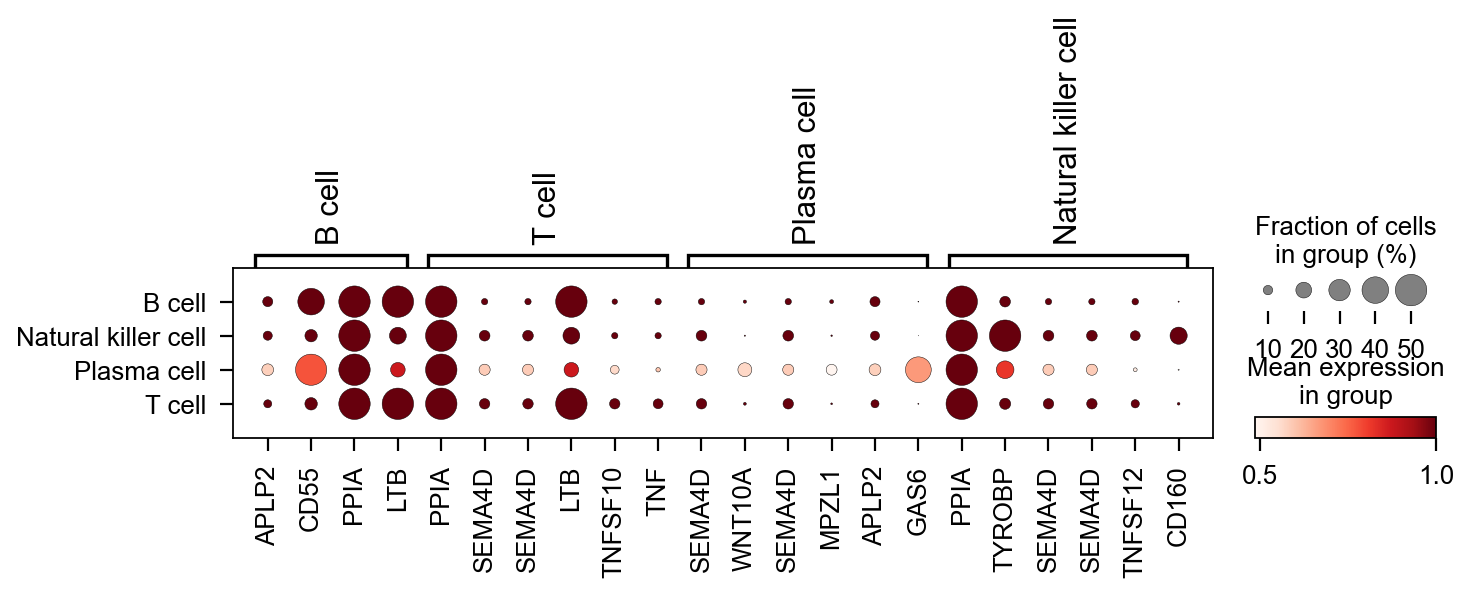

In [125]:
axes=sc.pl.dotplot(adata[adata.obs['major_celltype'].isin(['B cell','T cell','Plasma cell','Natural killer cell'])],
              ligand_dict,groupby='major_celltype',mean_only_expressed=True,
             cmap='Reds',vmax=1,dot_max=0.5,show=False)
#axes['mainplot_ax'].set_xticklabels('')
#axes['mainplot_ax'].tick_params(axis='x', which='both', bottom=False, top=True)
#axes['mainplot_ax'].xaxis.set_ticks_position('top')
plt.savefig("../figures/scrna/epi_ligand.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/epi_ligand.pdf",dpi=300,bbox_inches = 'tight')


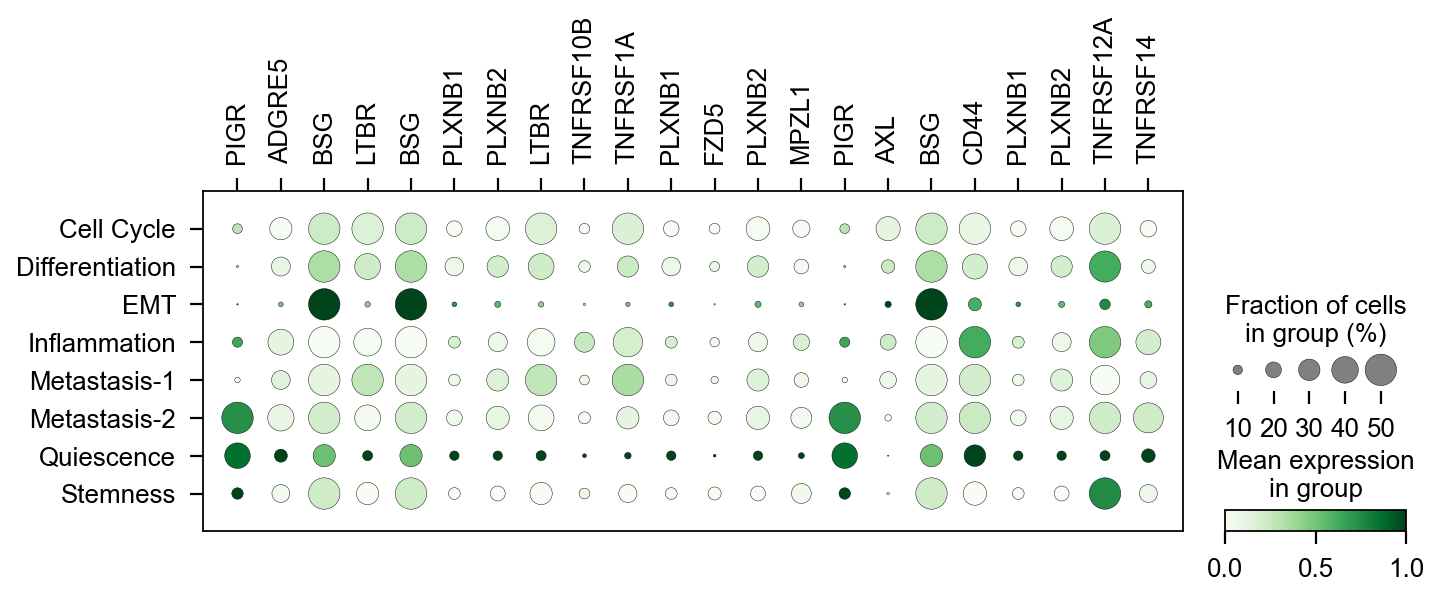

In [158]:
axes=sc.pl.dotplot(adata_can,receptor_li,groupby='minor_celltype',mean_only_expressed=True,
             cmap='Greens',standard_scale='var',dot_max=0.5,show=False)
axes['mainplot_ax'].tick_params(axis='x', which='both', bottom=False, top=True)
axes['mainplot_ax'].xaxis.set_ticks_position('top')
plt.savefig("../figures/scrna/epi_receptor.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/epi_receptor.pdf",dpi=300,bbox_inches = 'tight')

In [161]:
adata_can.write_h5ad('../data/crc_can.h5ad',compression='gzip')

In [169]:
adata.write_h5ad('../data/crc_raw.h5ad',compression='gzip')

In [162]:
import random
cell_idx=random.sample(adata.obs.index.tolist(),50000)
adata_sea=adata[cell_idx]

In [163]:
adata_sea

View of AnnData object with n_obs × n_vars = 50000 × 25121
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [165]:
adata_sea.write_h5ad('../data/crc_50000.h5ad',compression='gzip')

<AxesSubplot: title={'center': 'major_celltype'}, xlabel='X_umap1', ylabel='X_umap2'>

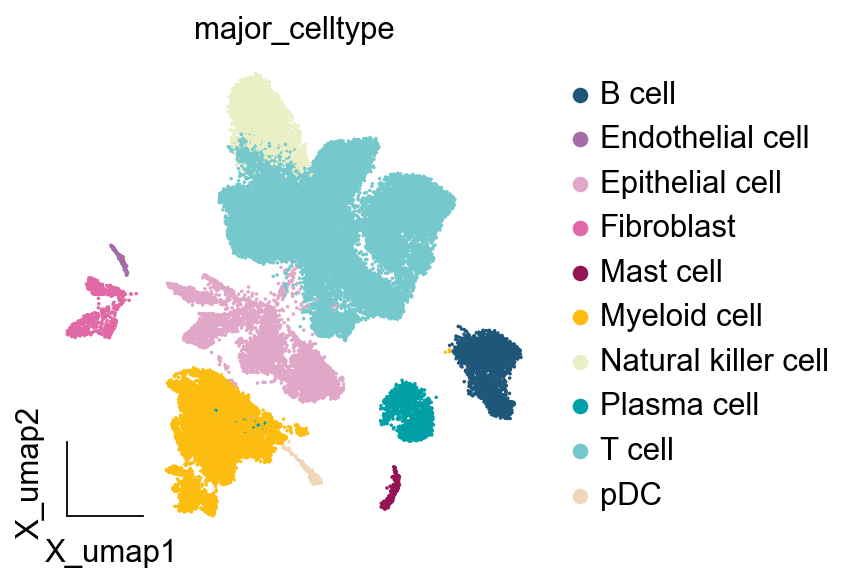

In [164]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata_sea,
    basis="X_umap",
    color=['major_celltype'],
    frameon='small',
    #title="Automatic Annotation CRC",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    #legend_loc='', 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.utils.blue_color[:],
    #legend_fontweight='normal'
)

In [166]:
## User defined parameters

## Core parameters 
n_SEACells = 500
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [167]:
import SEACells
model = SEACells.core.SEACells(adata_sea, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


Welcome to SEACells!


In [168]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/50000 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/50000 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/50000 [00:00<?, ?it/s]

Constructing CSR matrix...


In [170]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
Done.
Sampling waypoints ...
Done.
Selecting 459 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 51/51 [00:06<00:00,  8.15it/s]

Selecting 41 cells from greedy initialization.


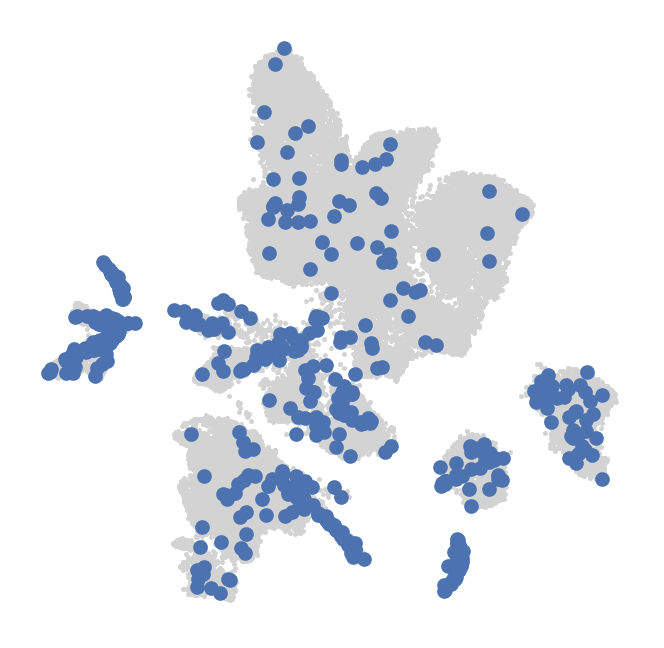

In [177]:
%matplotlib inline
# Plot the initilization to ensure they are spread across phenotypic space
ax=SEACells.plot.plot_initialization(adata_sea, model,plot_basis='X_umap',
                                     save_as='../figures/scrna/sea_meta1.png',show=True)
#plt.savefig("../figures/scrna/sea_meta1.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("../pdf/scrna/sea_meta1.pdf",dpi=300,bbox_inches = 'tight')


In [175]:
help(SEACells.plot.plot_initialization)

Help on function plot_initialization in module SEACells.plot:

plot_initialization(ad, model, plot_basis='X_umap', save_as=None, show=True)
    Plot archetype initizlation
    :param ad: annData containing 'Metacells' label in .obs
    :param model: Initilized SEACells model
    :return: None



In [178]:
model.fit(min_iter=10, max_iter=100)

Randomly initialized A matrix.
Setting convergence threshold at 0.00411
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 34 iterations.


In [ ]:
# You can force the model to run additional iterations step-wise using the .step() function
print(f'Ran for {len(model.RSS_iters)} iterations')
for _ in range(5):
    model.step()
print(f'Ran for {len(model.RSS_iters)} iterations')

In [179]:
adata_sea.obs[['SEACell']].head()

SEACell
index                                   
TTGACTTAGGACGAAA_COL17_PBMC  SEACell-114
TCAGATGGTCCGTTAA_COL07_CRC   SEACell-390
CAACCTCAGTGTCCAT_COL12_PBMC  SEACell-266
ACACCAAAGCATGGCA_COL17_CRC    SEACell-92
ACACTGAGTACGCTGC_COL15_LM    SEACell-393

In [180]:
adata_sea.write_h5ad('../data/crc_50000_SEACell.h5ad',compression='gzip')

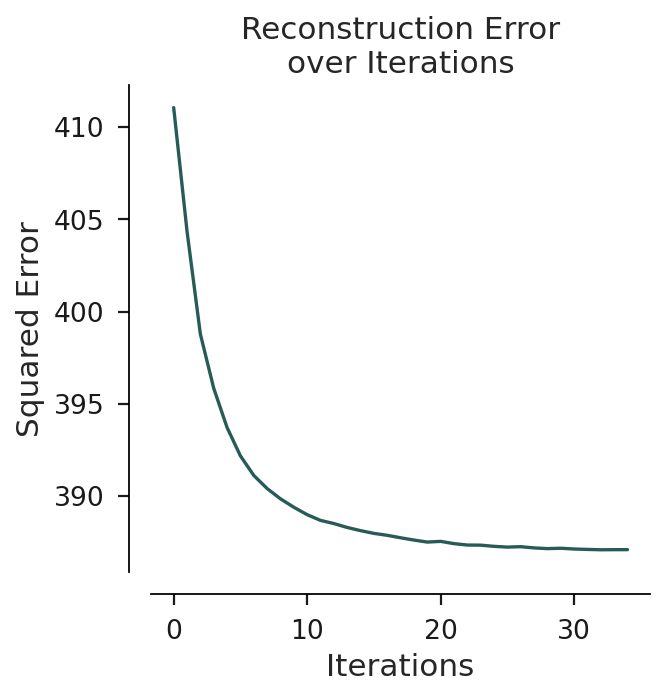

In [327]:
# Check for convergence 

fig, ax = plt.subplots(figsize=(4,4))
plt.plot(model.RSS_iters,color=ov.utils.blue_color[6])
plt.title("Reconstruction Error\nover Iterations")
plt.xlabel("Iterations")
plt.ylabel("Squared Error")
#plt.title('Celltype Purity')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("../figures/scrna/sea_loss.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/sea_loss.pdf",dpi=300,bbox_inches = 'tight')


In [296]:
help(model.plot_convergence)

Help on method plot_convergence in module SEACells.core:

plot_convergence(save_as=None, show=True) method of SEACells.core.SEACells instance
    Plot behaviour of squared error over iterations.
    :param save_as: (str) name of file which figure is saved as. If None, no plot is saved.



In [182]:
model.get_hard_assignments().head()

SEACell
index                                   
TTGACTTAGGACGAAA_COL17_PBMC  SEACell-114
TCAGATGGTCCGTTAA_COL07_CRC   SEACell-390
CAACCTCAGTGTCCAT_COL12_PBMC  SEACell-266
ACACCAAAGCATGGCA_COL17_CRC    SEACell-92
ACACTGAGTACGCTGC_COL15_LM    SEACell-393

In [183]:
import pickle
with open('seamodel.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
import pickle
with open('seamodel.pkl','rb') as f:
    model=pickle.load(f)

In [ ]:
#Metacells analysis
model=ov.single.SEAcells(adata_sea, build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)
model.fit(min_iter=10, max_iter=100)
model.save('epi_meta.pkl')
model.load('epi_meta.pkl')
model.compute_celltype_purity()
model.summarize_by_soft_SEACell(celltype_label='major_celltype',minimum_weight=0.05)

In [279]:
SEACell_purity = SEACells.evaluate.compute_celltype_purity(adata_sea, 'major_celltype')
SEACell_purity.head()

major_celltype  major_celltype_purity
SEACell                                              
SEACell-0               T cell               1.000000
SEACell-1         Myeloid cell               0.971963
SEACell-2               T cell               1.000000
SEACell-3  Natural killer cell               0.983240
SEACell-4               T cell               1.000000

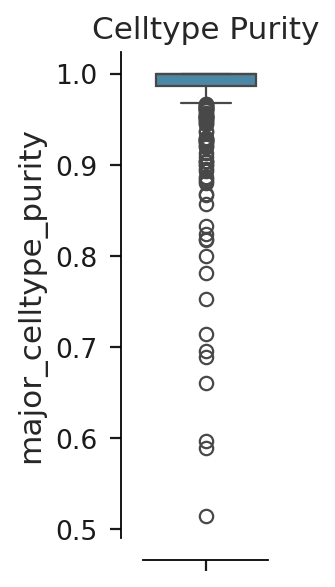

In [305]:
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(data=SEACell_purity, y='major_celltype_purity',ax=ax,
           color=ov.utils.blue_color[3])
plt.title('Celltype Purity')
sns.despine()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("../figures/scrna/sea_Purity.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/sea_Purity.pdf",dpi=300,bbox_inches = 'tight')


In [286]:
separation = SEACells.evaluate.separation(adata_sea, 'X_pca',nth_nbr=1)
separation.head()

Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


separation
SEACell              
SEACell-0    0.005277
SEACell-1    0.046232
SEACell-2    0.003311
SEACell-3    0.023972
SEACell-4    0.023634

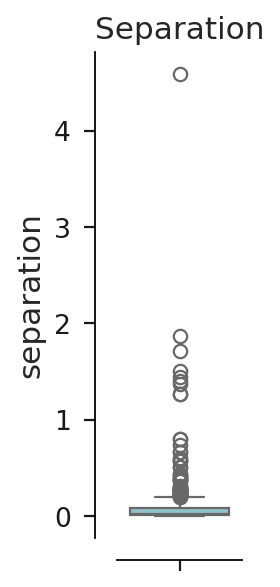

In [306]:
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(data=separation, y='separation',ax=ax,
           color=ov.utils.blue_color[4])
plt.title('Separation')
sns.despine()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("../figures/scrna/sea_Separation.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/sea_Separation.pdf",dpi=300,bbox_inches = 'tight')


In [288]:
compactness = SEACells.evaluate.compactness(adata_sea, 'X_pca')
compactness.head()

Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


compactness
SEACell               
SEACell-0     0.000111
SEACell-1     0.015470
SEACell-2     0.000045
SEACell-3     0.005244
SEACell-4     0.001844

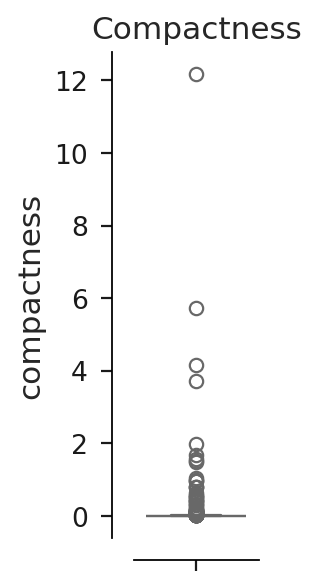

In [307]:
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(data=compactness, y='compactness',ax=ax,
           color=ov.utils.blue_color[4])
plt.title('Compactness')
sns.despine()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("../figures/scrna/sea_Compactness.png",dpi=300,bbox_inches = 'tight')
plt.savefig("../pdf/scrna/sea_Compactness.pdf",dpi=300,bbox_inches = 'tight')


In [228]:
umap = pd.DataFrame(adata_sea.obsm['X_umap']).set_index(adata_sea.obs_names).join(adata_sea.obs["SEACell"])
umap["SEACell"] = umap["SEACell"].astype("category")
mcs = umap.groupby("SEACell").mean().reset_index()

In [230]:
mcs.head()

SEACell         0          1
0  SEACell-0  4.397732   8.469477
1  SEACell-1 -0.922364  -2.708190
2  SEACell-2  1.587524   9.127233
3  SEACell-3  2.474712  16.048445
4  SEACell-4  5.170829   2.989636

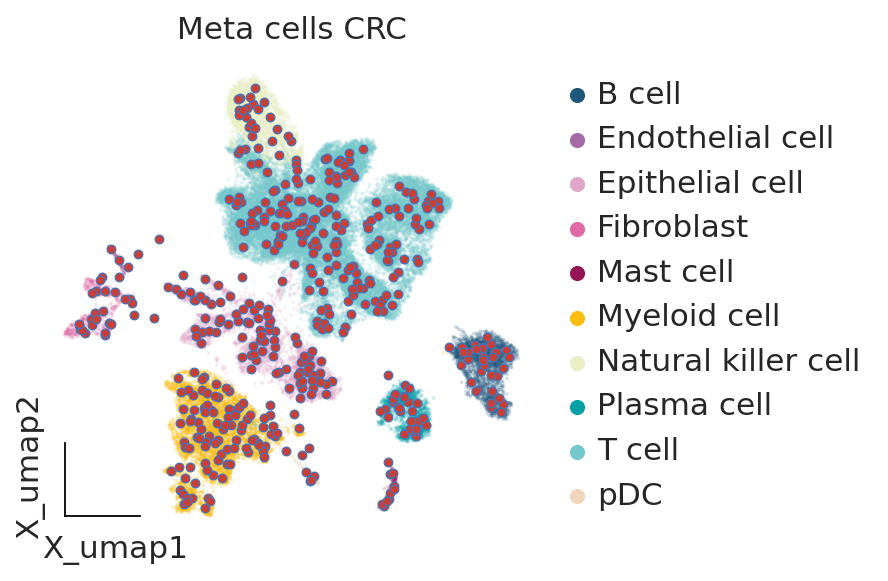

In [267]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata_sea,
    basis="X_umap",
    color=['major_celltype'],
    frameon='small',
    title="Meta cells CRC",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    alpha=0.2,
    #legend_loc='', 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.utils.blue_color[:],
    #legend_fontweight='normal'
)
ax.scatter(mcs[0],mcs[1],s=15,c=ov.utils.red_color[2],
           edgecolors='b',linewidths=0.6,
          alpha=1)
fig.savefig("../figures/scrna/umap_celltype_meta_meta.png",dpi=300,bbox_inches = 'tight')
fig.savefig("../pdf/scrna/umap_celltype_meta_meta.pdf",dpi=300,bbox_inches = 'tight')


In [190]:
adata_sea.raw=adata_sea.copy()

In [191]:
SEACell_soft_ad = SEACells.core.summarize_by_soft_SEACell(adata_sea, model.A_, 
                                                          celltype_label='major_celltype',
                                                          summarize_layer='raw', minimum_weight=0.05)
SEACell_soft_ad

100%|██████████| 500/500 [39:37<00:00,  4.76s/it]


AnnData object with n_obs × n_vars = 500 × 25121
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity'

In [192]:
SEACell_soft_ad.write_h5ad('../data/crc_SEACell_soft_ad.h5ad',compression='gzip')

In [194]:
sc.pp.highly_variable_genes(SEACell_soft_ad,  n_top_genes=2500, inplace=True)
sc.tl.pca(SEACell_soft_ad, use_highly_variable=True)
sc.pp.neighbors(SEACell_soft_ad, use_rep='X_pca')
sc.tl.umap(SEACell_soft_ad)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


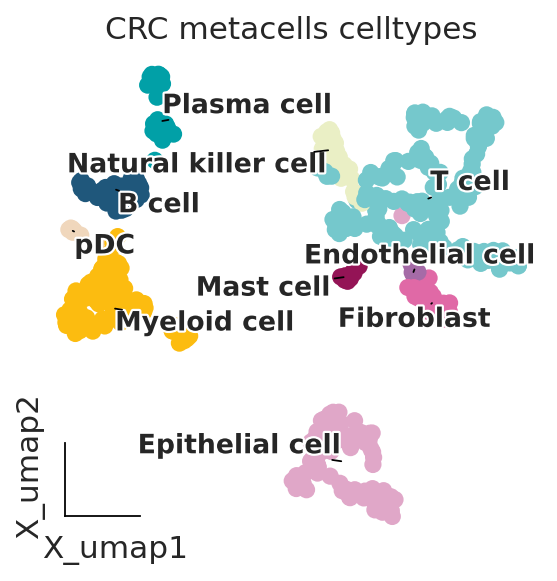

In [199]:
 import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    SEACell_soft_ad,
    basis="X_umap",
    color=['celltype'],
    frameon='small',
    title="CRC metacells celltypes",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    #size=10,
    ax=ax,
    legend_loc=None, add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.palette()[12:],
    #legend_fontweight='normal'
)
ov.utils.gen_mpl_labels(
    SEACell_soft_ad,
    'celltype',
    exclude=("None",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize= 12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

fig.savefig("../figures/scrna/umap_celltype_meta_scsa.png",dpi=300,bbox_inches = 'tight')
fig.savefig("../pdf/scrna/umap_celltype_meta_scsa.pdf",dpi=300,bbox_inches = 'tight')


In [216]:
SEACell_soft_ad.write_h5ad('../data/crc_SEACell_soft_ad_anno.h5ad',compression='gzip')

In [202]:
pathway_dict=ov.utils.geneset_prepare('KEGG_2021_Human.txt',organism='Human')

In [ ]:
##Assest all pathways
adata_aucs=ov.single.pathway_aucell_enrichment(SEACell_soft_ad,
                                                pathways_dict=pathway_dict,
                                                num_workers=8)

In [204]:
adata_aucs.obs=SEACell_soft_ad[adata_aucs.obs.index].obs
adata_aucs.obsm=SEACell_soft_ad[adata_aucs.obs.index].obsm
adata_aucs.obsp=SEACell_soft_ad[adata_aucs.obs.index].obsp
adata_aucs.uns=SEACell_soft_ad[adata_aucs.obs.index].uns

adata_aucs

AnnData object with n_obs × n_vars = 500 × 320
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [210]:
sc.tl.rank_genes_groups(adata_aucs, groupby='celltype', 
                        method='t-test',use_rep='X_pca',)
ov.single.cosg(adata_aucs, key_added='celltype_cosg', groupby='celltype')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
**finished identifying marker genes by COSG**


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_celltype']`


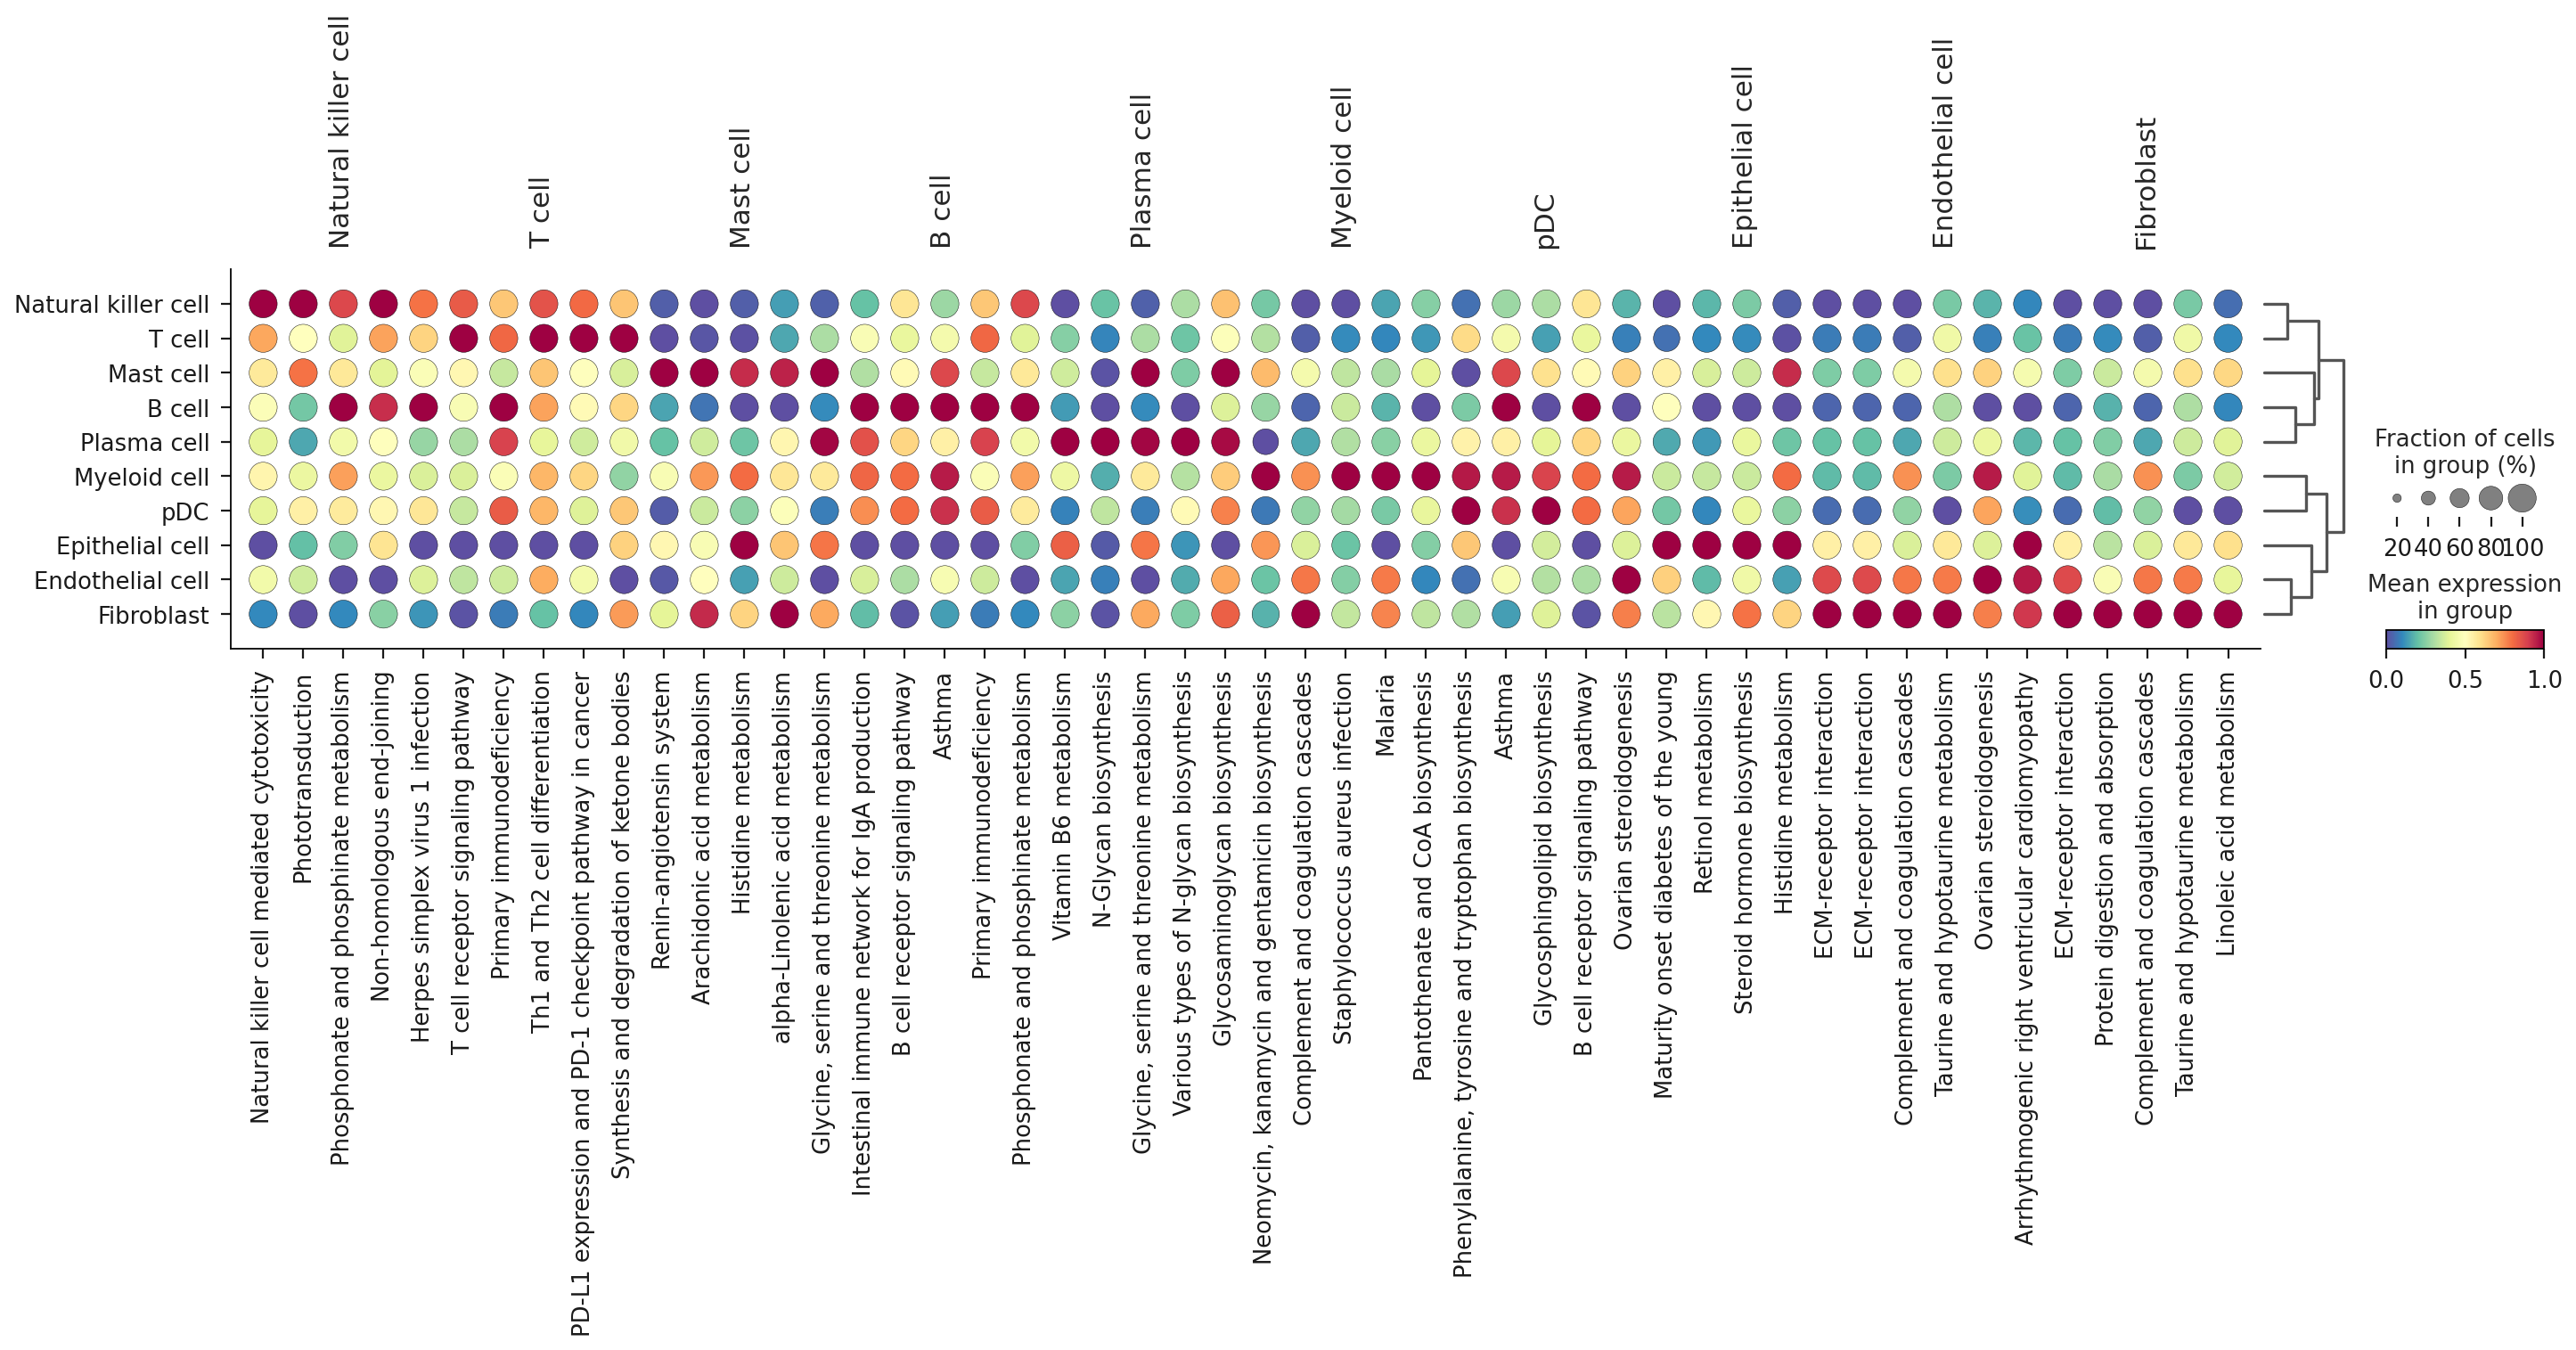

In [211]:
sc.pl.rank_genes_groups_dotplot(adata_aucs,groupby='celltype',
                                cmap='Spectral_r',key='celltype_cosg',
                                standard_scale='var',n_genes=5)

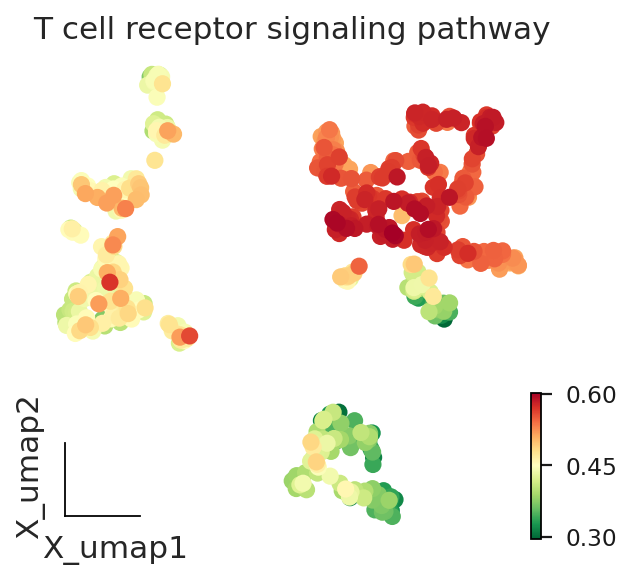

In [215]:
fig, ax = plt.subplots(figsize=(4,4))
genesets='T cell receptor signaling pathway'
ov.utils.embedding(
    adata_aucs,
    basis="X_umap",
    color=[genesets],
    frameon='small',
    #title="CRC metacells celltypes",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    #size=10,
    ax=ax,
    #legend_loc=None, add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    cmap='RdYlGn_r',
    #palette=ov.palette()[12:],
    #legend_fontweight='normal'
)
fig.savefig(f"../figures/scrna/umap_celltype_meta_{genesets}.png",dpi=300,bbox_inches = 'tight')
fig.savefig(f"../pdf/scrna/umap_celltype_meta_{genesets}.pdf",dpi=300,bbox_inches = 'tight')


In [217]:
adata_aucs.write_h5ad('../data/crc_SEACell_soft_aucs.h5ad',compression='gzip')

In [ ]:
##Assest all pathways
adata_aucs_all=ov.single.pathway_aucell_enrichment(adata_sea,
                                                pathways_dict=pathway_dict,
                                                num_workers=8)

In [219]:
adata_aucs_all.obs=adata_sea[adata_aucs_all.obs.index].obs
adata_aucs_all.obsm=adata_sea[adata_aucs_all.obs.index].obsm
adata_aucs_all.obsp=adata_sea[adata_aucs_all.obs.index].obsp
adata_aucs_all.uns=adata_sea[adata_aucs_all.obs.index].uns

adata_aucs_all

AnnData object with n_obs × n_vars = 50000 × 320
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'scsa_celltype', 'major_celltype', 'scsa_true_celltype', 'SEACell'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'scrublet', 'scsa_celltype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

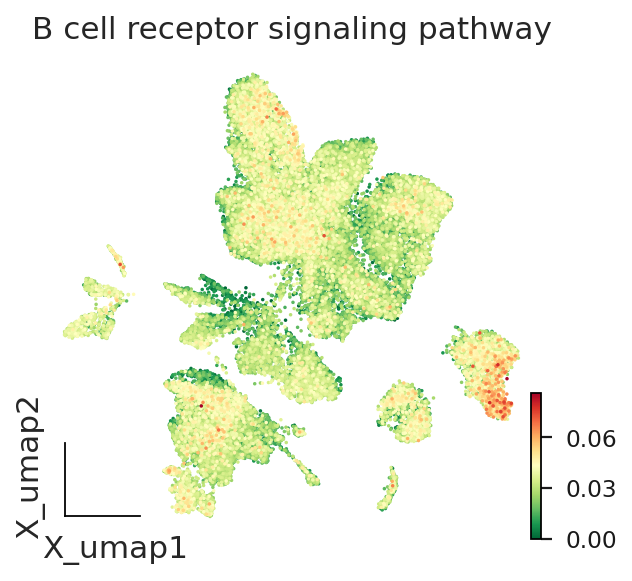

In [277]:
fig, ax = plt.subplots(figsize=(4,4))
genesets='B cell receptor signaling pathway'
ov.utils.embedding(
    adata_aucs_all,
    basis="X_umap",
    color=[genesets],
    frameon='small',
    #title="CRC metacells celltypes",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    size=10,
    ax=ax,
    #legend_loc=None, add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    cmap='RdYlGn_r',
    #vmax=0.07,
    #palette=ov.palette()[12:],
    #legend_fontweight='normal'
)
fig.savefig(f"../figures/scrna/umap_celltype_all_{genesets}.png",dpi=300,bbox_inches = 'tight')
fig.savefig(f"../pdf/scrna/umap_celltype_all_{genesets}.pdf",dpi=300,bbox_inches = 'tight')


In [268]:
adata_aucs_all.write_h5ad('../data/crc_SEACell_soft_aucs_all.h5ad',compression='gzip')

In [ ]:
import omicverse as ov
adata=ov.read('epi.h5ad')
#Automatical annotation
scsa=ov.single.pySCSA(adata,foldchange=1.5,pvalue=0.05,celltype='cancer',
                      target='cancersea',tissue='All')
scsa.cell_anno(clustertype='leiden',cluster='all')
scsa.cell_auto_anno(adata)

In [ ]:
##Assest one genesets
ov.single.geneset_aucell(adata,geneset_name='Sox',
                         geneset=['Sox17', 'Sox4', 'Sox7', 'Sox18', 'Sox5'])
##Assest all pathways
pathway_dict=ov.utils.geneset_prepare('KEGG_2021_Human.txt',organism='Human')
adata_aucs=ov.single.pathway_aucell_enrichment(adata,
                                               pathways_dict=pathway_dict,
                                               num_workers=8)

In [ ]:
#Trajectory inference
v0 = ov.single.pyVIA(adata=adata,adata_key='X_pca',basis='X_umap',
                     clusters='celltype',knn=30,oot_user=['Stemness'],)
v0.run()
v0.get_pseudotime(adata)
#PAGA Graph
ov.utils.cal_paga(adata,use_time_prior='pt_via',vkey='paga',groups='celltype')

In [ ]:
#cell-cell interaction
cpdb=ov.single.cpdb(cpdb_file_path,adata,cluster_key='celltype')
interaction=cpdb.network_cal(cluster_key='celltype') 
cpdb.submeans_exacted(cell_names='Epithelial cell',cell_type='receptor')
cpdb.submeans_exacted(cell_names='Epithelial cell',cell_type='ligand')